In [7]:
# !pip install torch

In [10]:
import torch
import torch.nn as nn

# Pytorch Variable Examples

In [11]:
a = torch.tensor([[1, 2],
                 [3, 4]])
print(a)

tensor([[1, 2],
        [3, 4]])


In [12]:
b = torch.add(a, 1)
print(b)

tensor([[2, 3],
        [4, 5]])


In [13]:
print(a * b)

tensor([[ 2,  6],
        [12, 20]])


In [14]:
a = torch.tensor(3.0, dtype=torch.float32)
b = torch.tensor(4.0, dtype=torch.float32)

c = a+b
print(c)

tensor(7.)


In [15]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)
print(type(c))

tensor(12.)
<class 'torch.Tensor'>


In [16]:
print(a.numpy())
print(type(a))
print(type(a.numpy()))

3.0
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


# Simple Neural Network with PyTorch

(10000, 1)
(10000, 1)


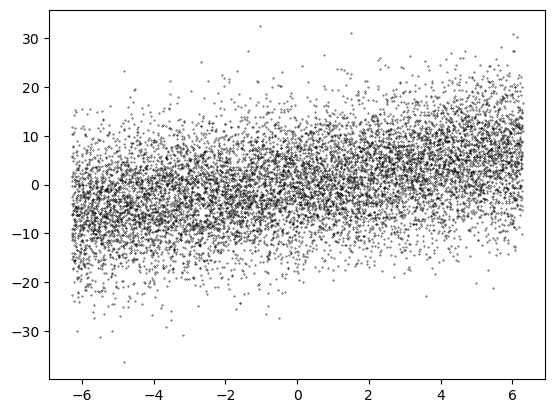

In [17]:
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = inputs + 8 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')

In [20]:
# Create a linear model
linear_model = nn.Sequential(
    nn.Linear(1,1)
)

In [21]:
input_tensor = torch.from_numpy(inputs.astype(np.float32))
linear_predictions = linear_model(input_tensor)
print(linear_predictions)

tensor([[-3.2753],
        [-3.2747],
        [-3.2742],
        ...,
        [ 2.0344],
        [ 2.0350],
        [ 2.0355]], grad_fn=<AddmmBackward0>)


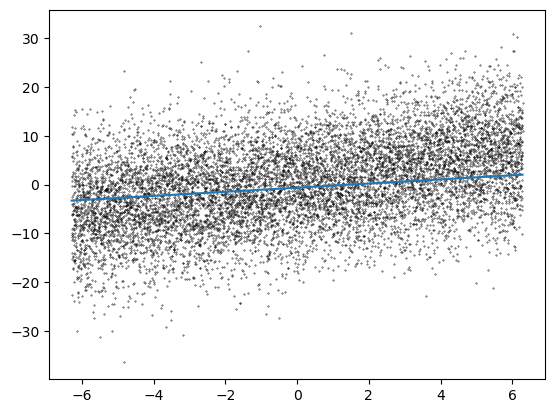

In [22]:
# Plot the untrained results
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0].detach().numpy())

In [23]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(linear_model.parameters(), lr=0.01)


In [ ]:
output_tensor = torch.from_numpy(outputs.astype(np.float32))

for epoch in range(3):
    permutation = torch.randperm(input_tensor.size()[0])
    tot_loss = 0
    for i in range(0,inputs.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()


        y_pred = linear_model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()
        # print statistics
        tot_loss += loss
    print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')


print('Finished Training')


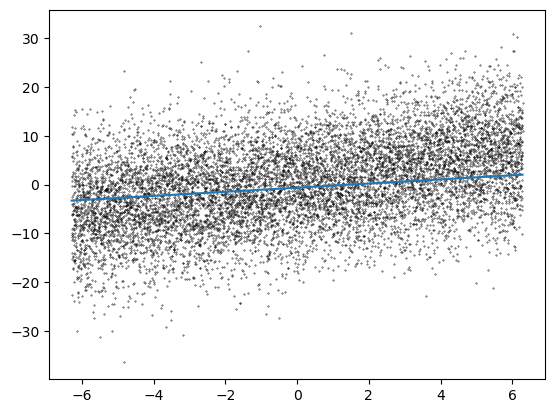

In [24]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], linear_predictions[:, 0].detach().numpy())

## Utilizing a more Complicated Example

(10000, 1)
(10000, 1)


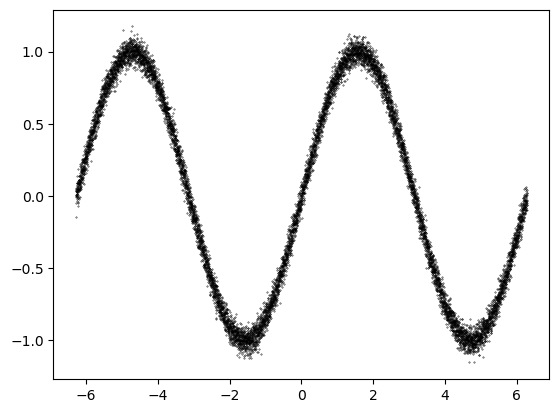

In [25]:
# Input data
import numpy as np
inputs = np.linspace(-2*np.pi, 2*np.pi, 10000)[:, None]
outputs = np.sin(inputs) + 0.05 * np.random.normal(size=[len(inputs),1])
print(inputs.shape)
print(outputs.shape)
import matplotlib.pyplot as plt

input_tensor = torch.from_numpy(inputs.astype(np.float32))
output_tensor = torch.from_numpy(outputs.astype(np.float32))


plt.scatter(input_tensor[:, 0], output_tensor[:, 0], s=0.1, color='k', marker='o')



In [28]:
model = nn.Sequential(
    nn.Linear(1,1),
    nn.Sigmoid()
    )


In [29]:
pred = model(input_tensor)
print(linear_predictions)

tensor([[-3.2753],
        [-3.2747],
        [-3.2742],
        ...,
        [ 2.0344],
        [ 2.0350],
        [ 2.0355]], grad_fn=<AddmmBackward0>)


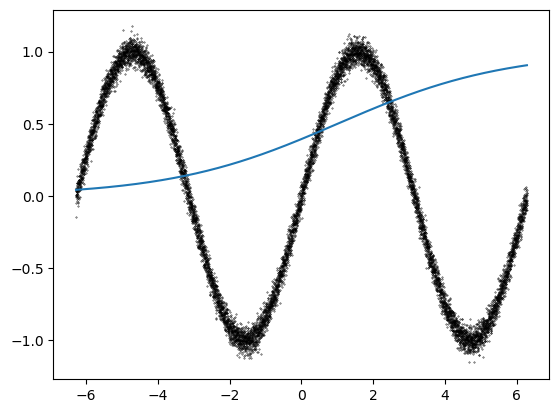

In [30]:
plt.scatter(input_tensor[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(input_tensor[:, 0], pred.detach().numpy()[:, 0])

In [32]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


for epoch in range(3):
  
    permutation = torch.randperm(input_tensor.size()[0])
    for i in range(0,inputs.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()


        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()


        print(f'{epoch + 1} loss: {loss}')


print('Finished Training')



1 loss: 0.48274683952331543
1 loss: 0.6152055263519287
1 loss: 0.4765379726886749
1 loss: 0.6550933718681335
1 loss: 0.4641549289226532
1 loss: 0.5103412866592407
1 loss: 0.5471071004867554
1 loss: 0.4672914743423462
1 loss: 0.37455451488494873
1 loss: 0.4617580473423004
1 loss: 0.45120954513549805
1 loss: 0.4606114625930786
1 loss: 0.6513085961341858
1 loss: 0.4798695147037506
1 loss: 0.41785529255867004
1 loss: 0.556117057800293
1 loss: 0.5032080411911011
1 loss: 0.46988949179649353
1 loss: 0.4692949056625366
1 loss: 0.628433346748352
1 loss: 0.59560626745224
1 loss: 0.6798028349876404
1 loss: 0.48324304819107056
1 loss: 0.49636438488960266
1 loss: 0.43820109963417053
1 loss: 0.483132004737854
1 loss: 0.41391322016716003
1 loss: 0.38056036829948425
1 loss: 0.4922085702419281
1 loss: 0.41097143292427063
1 loss: 0.5248940587043762
1 loss: 0.4659903049468994
1 loss: 0.44920554757118225
1 loss: 0.5981336832046509
1 loss: 0.4832744598388672
1 loss: 0.6667001247406006
1 loss: 0.52069199085

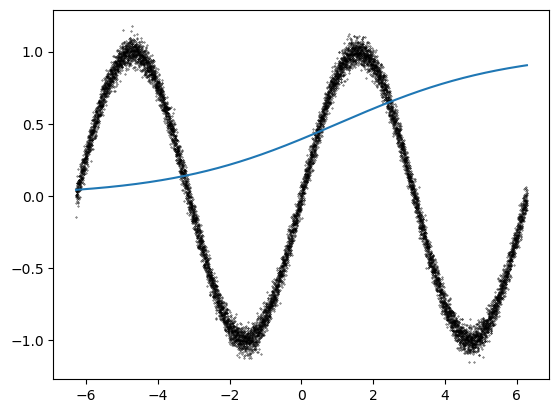

In [33]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], pred.detach().numpy()[:, 0])

##Deeper Model

In [34]:
model = nn.Sequential(
    nn.Linear(1,16),
    nn.Sigmoid(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [35]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())


In [36]:
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)


In [37]:
inputs.shape[0]

10000

In [38]:

for epoch in range(5):
    tot_loss = 0
    permutation = torch.randperm(input_tensor.size()[0])
    for i in range(0,inputs.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()
        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

        tot_loss += loss
    print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')

print('Finished Training')



1 loss: 0.40925514698028564
2 loss: 0.230447918176651
3 loss: 0.09494806081056595
4 loss: 0.0713299810886383
5 loss: 0.06549706310033798
Finished Training


In [26]:
pred = model(input_tensor)

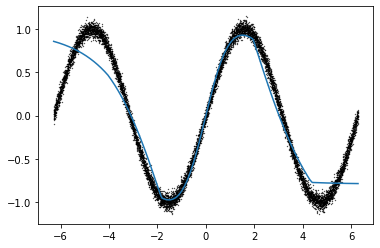

In [27]:
plt.scatter(inputs[:, 0], outputs[:, 0], s=0.1, color='k', marker='o')
plt.plot(inputs[:, 0], pred.detach().numpy()[:, 0])